In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Load the CSV file and get information about the dataset
df = pd.read_csv('../data/obesity.csv')
df.rename(columns={'family_history_with_overweight': 'in_family', 'FAVC':'caloric_food_freq','FCVC':'vegetable_in_meals'
                   ,'NCP':'daily_no_of_meals', 'CAEC':'eating_between_meals','CH2O':'daily_water_intake', 
                   'SMOKE':'smoker','SCC':'monitor_caloric_intake','FAF':'physical_activity_freq',
                   'TUE':'time_on_devices','CALC':'alcohol_intake','MTRANS':'transport_means',
                   'NObeyesdad':'obesity_level'}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2111 non-null   object 
 1   Age                     2111 non-null   int64  
 2   Height                  2111 non-null   float64
 3   Weight                  2111 non-null   float64
 4   in_family               2111 non-null   object 
 5   caloric_food_freq       2111 non-null   object 
 6   vegetable_in_meals      2111 non-null   float64
 7   daily_no_of_meals       2111 non-null   float64
 8   eating_between_meals    2111 non-null   object 
 9   smoker                  2111 non-null   object 
 10  daily_water_intake      2111 non-null   float64
 11  monitor_caloric_intake  2111 non-null   object 
 12  physical_activity_freq  2111 non-null   float64
 13  time_on_devices         2111 non-null   float64
 14  alcohol_intake          2111 non-null   

In [26]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [27]:
#Getting descriptive statistics of numerical data of the dataset
df.describe()

,Age,Height,Weight,vegetable_in_meals,daily_no_of_meals,daily_water_intake,physical_activity_freq,time_on_devices,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861,29.703255
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926,8.016007
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998298
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000,24.325802
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000,28.731747
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000,35.954953
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.816933


In [28]:
#A function to plot pie charts for non-categorical data
def plot_pie_chart(proportions, title, labels):
    plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

#Plotting a pie chart with more than 2 categories
def plot_pie_chart_multiple_categories(proportions, title, labels):
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.pie(proportions, autopct='%1.1f%%', startangle=140)
    ax.legend(title=title, labels=labels, loc='upper right')
    ax.set_title(title)
    plt.show()
#plotting count plots
def plot_count_plot(column, title, xlabel):
    sns.countplot(column)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(xlabel)
    plt.show()

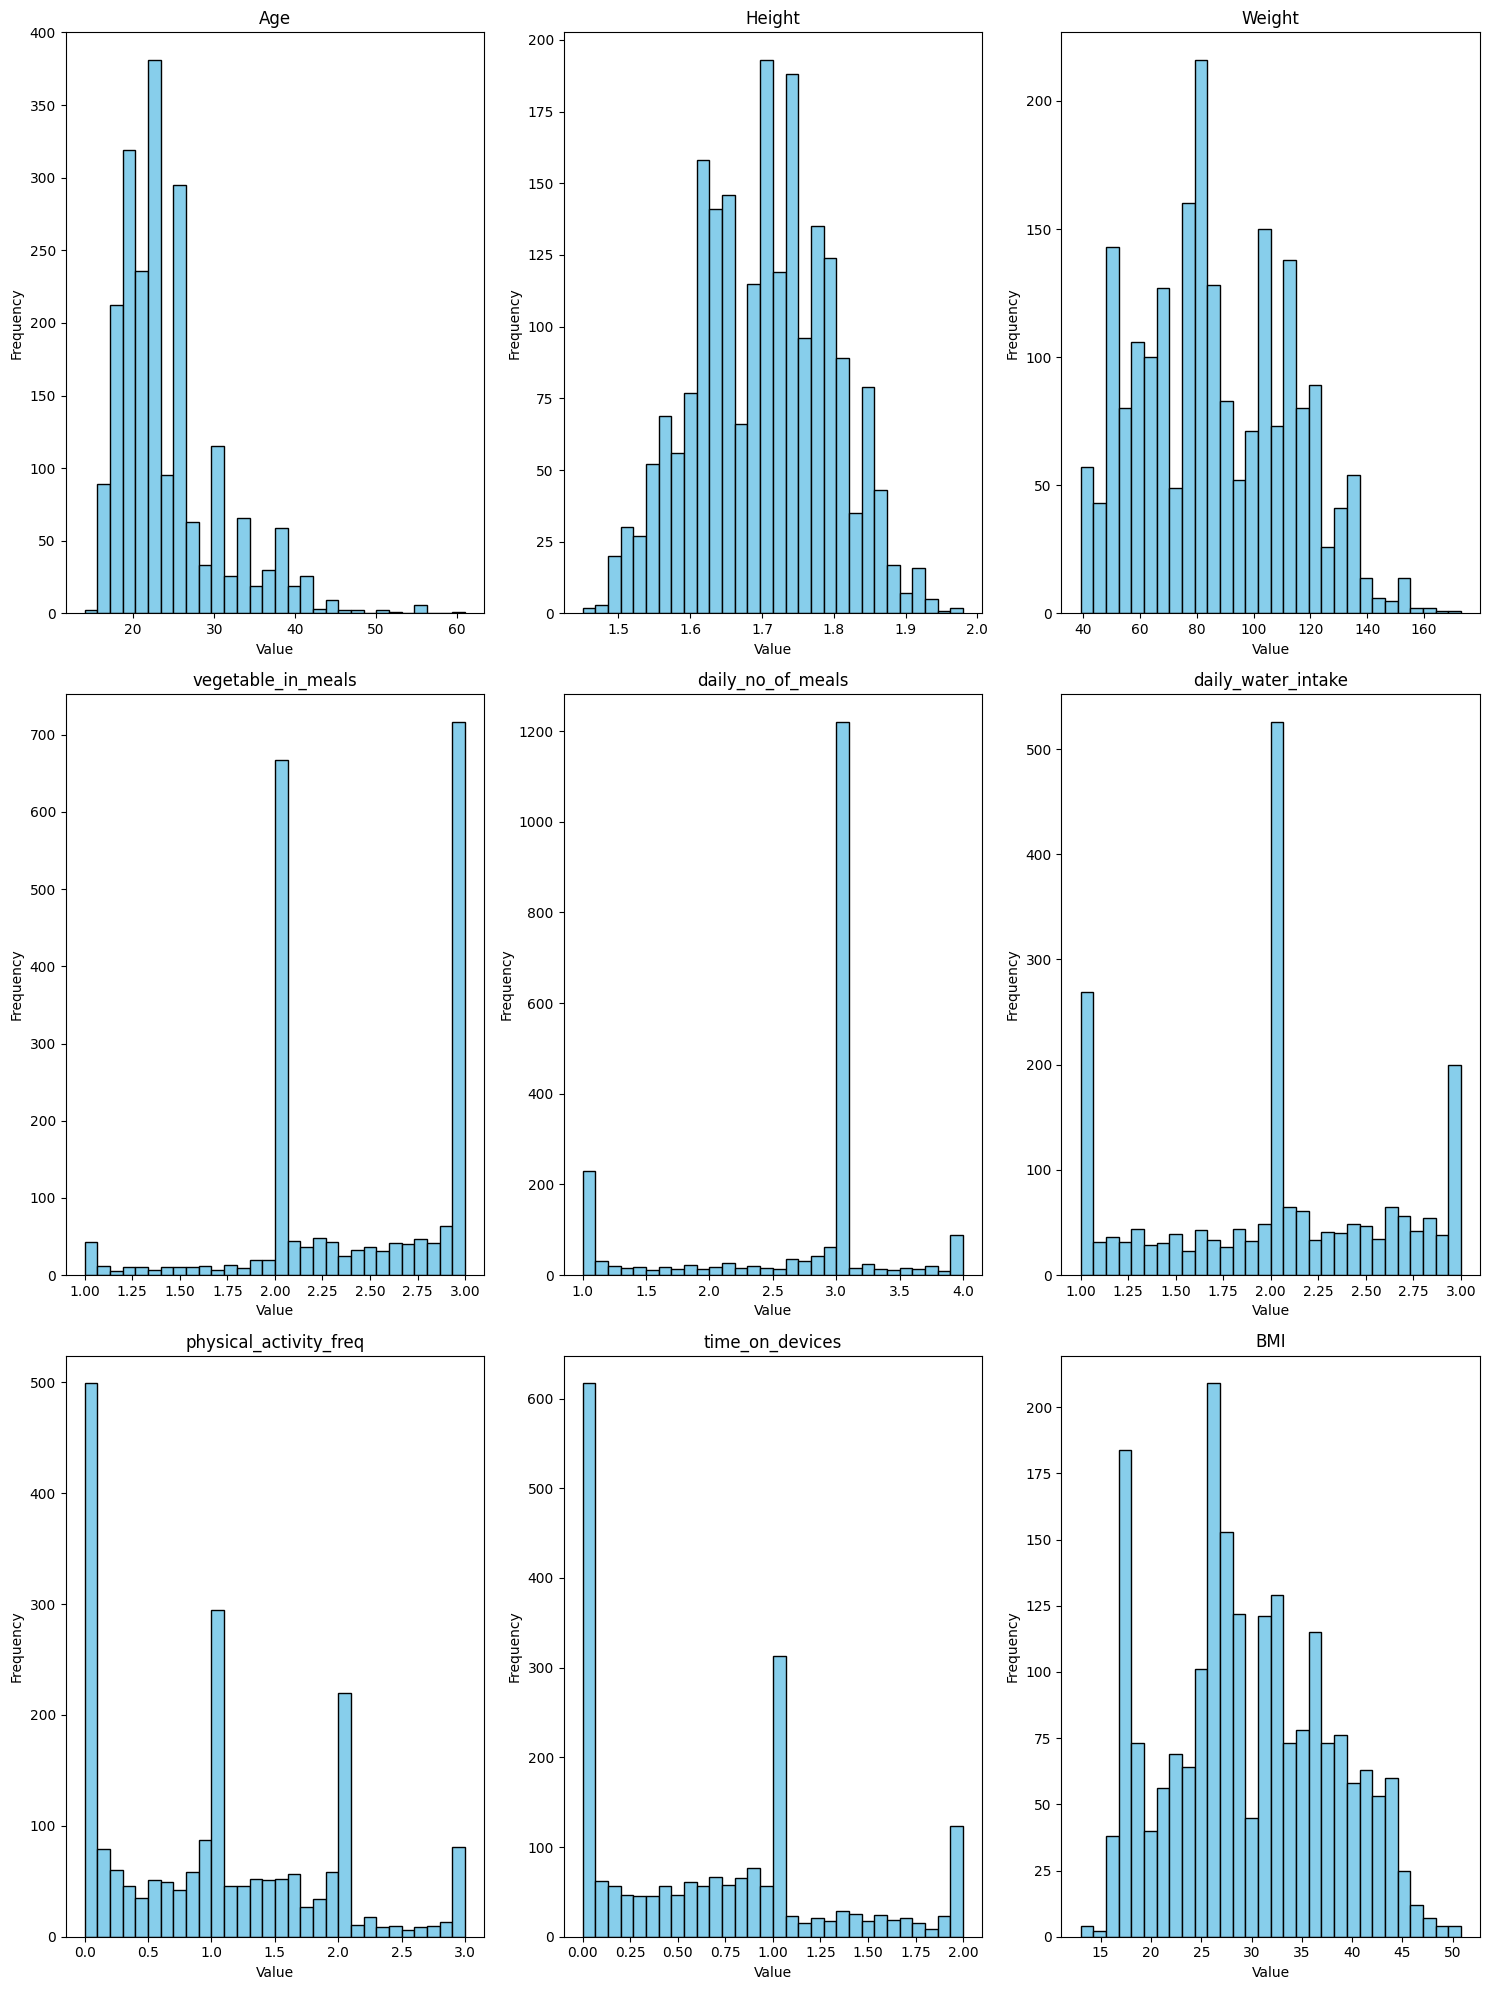

In [29]:
#Visualizations for numerical data
columns = [
    "Age", "Height", "Weight", "vegetable_in_meals",
    "daily_no_of_meals", "daily_water_intake",
    "physical_activity_freq", "time_on_devices", "BMI"
]
fig, axes = plt.subplots(3, 3, figsize=(15, 20))  # 4 rows × 2 columns = 8 axes
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

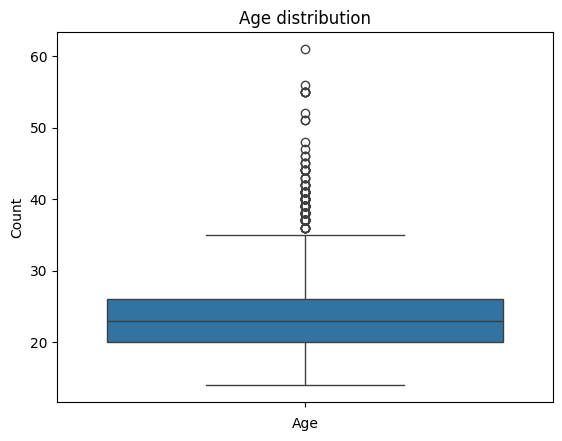

In [30]:
sns.boxplot(df['Age'])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [31]:
#Getting descriptive statistics of non-numerical data of the dataset
df.describe(include=['object'])


,Gender,in_family,caloric_food_freq,eating_between_meals,smoker,monitor_caloric_intake,alcohol_intake,transport_means,obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


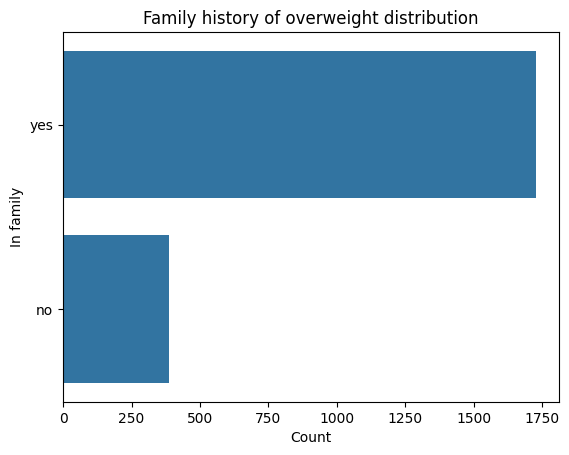

In [32]:
plot_count_plot(df['in_family'], "Family history of overweight distribution", "In family")

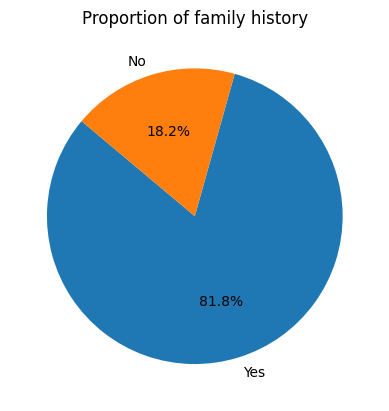

In [33]:
family_proportion = df['in_family'].value_counts()/df['in_family'].count()
plot_pie_chart(family_proportion, "Proportion of family history", labels=['Yes', 'No'])

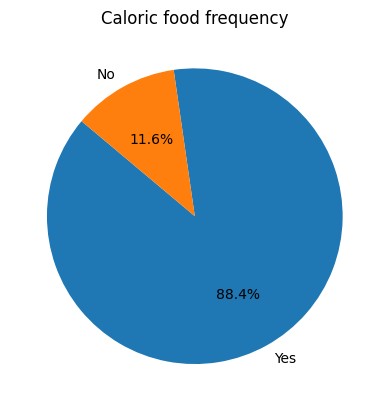

In [34]:
caloric_food_freq_proportion = df['caloric_food_freq'].value_counts()/df['caloric_food_freq'].count()
plot_pie_chart(caloric_food_freq_proportion, "Caloric food frequency", labels=['Yes','No'])

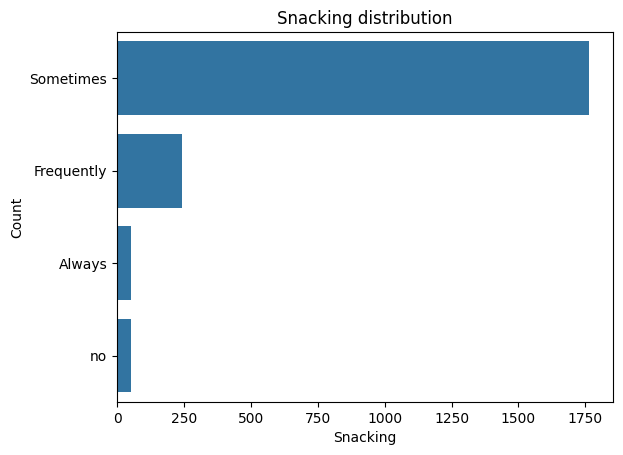

In [35]:
sns.countplot(df['eating_between_meals'])
plt.title("Snacking distribution")
plt.xlabel("Snacking")
plt.ylabel("Count")
plt.show()

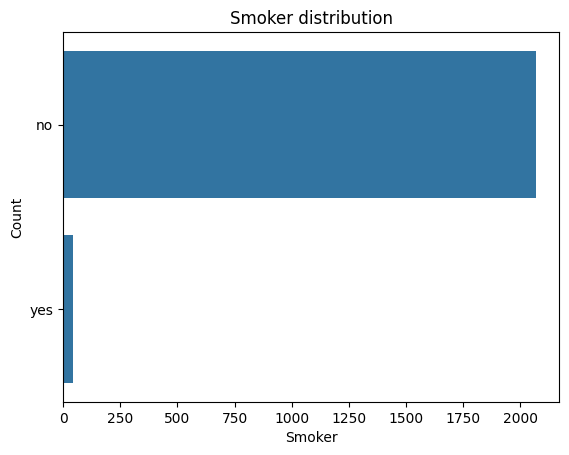

In [36]:
smokers = df['smoker']
smokers.value_counts()
sns.countplot(smokers)
plt.title("Smoker distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

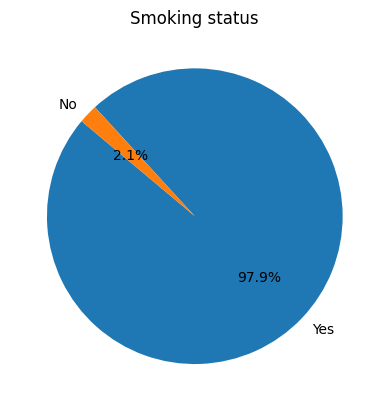

In [37]:
smoking_proportion = df['smoker'].value_counts()/df['smoker'].count()
plot_pie_chart(smoking_proportion, "Smoking status", labels=['Yes', 'No'])

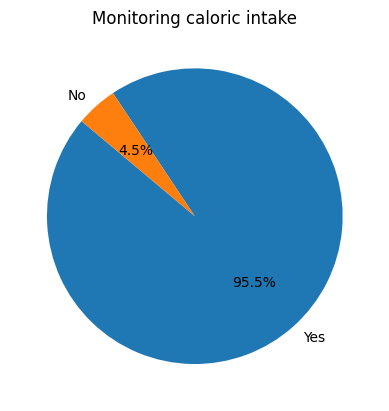

In [38]:
monitor_caloric_intake_proportion = df['monitor_caloric_intake'].value_counts()/df['monitor_caloric_intake'].count()
plot_pie_chart(monitor_caloric_intake_proportion, "Monitoring caloric intake", labels=['Yes', 'No'])

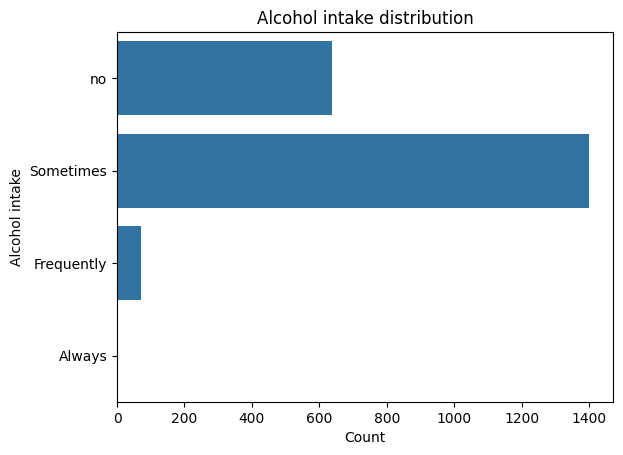

In [39]:
plot_count_plot(df['alcohol_intake'], "Alcohol intake distribution", "Alcohol intake")


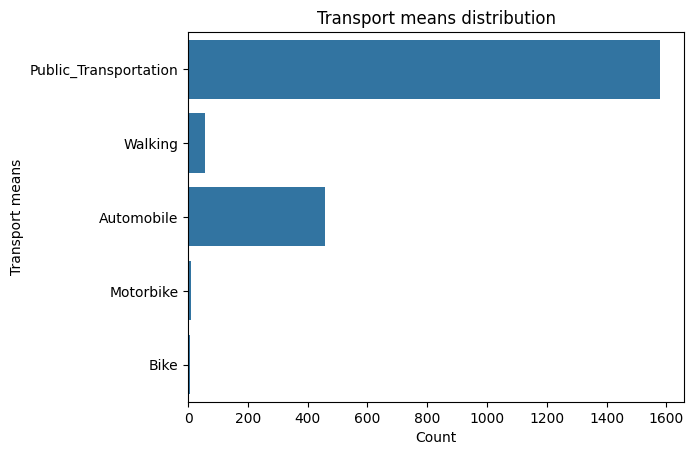

In [40]:
plot_count_plot(df['transport_means'], "Transport means distribution", "Transport means")

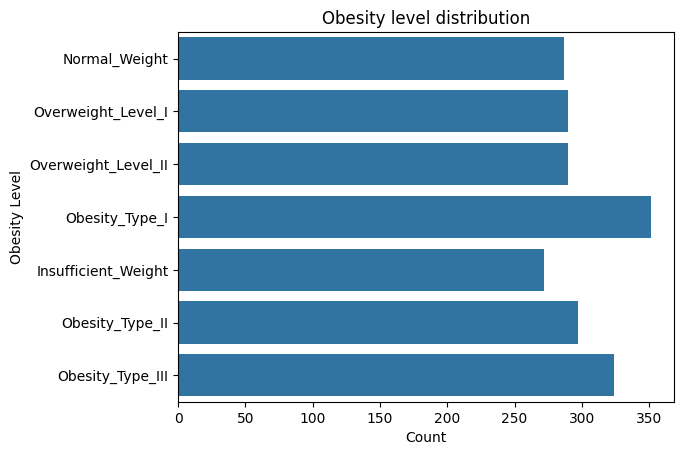

In [41]:
sns.countplot(df['obesity_level'])
plt.title("Obesity level distribution")
plt.xlabel("Count")
plt.ylabel("Obesity Level")
plt.show()

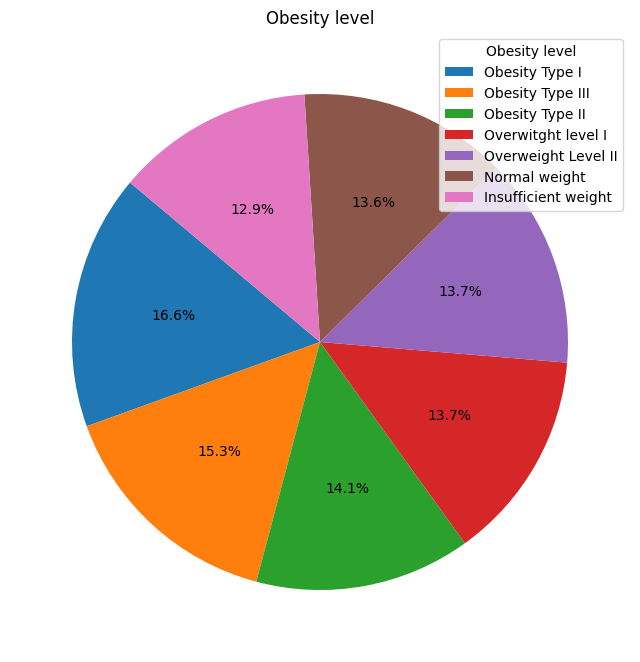

In [42]:
obesity_level_proportion = df['obesity_level'].value_counts()/df['obesity_level'].count()
plot_pie_chart_multiple_categories(obesity_level_proportion, "Obesity level", 
                                   labels=['Obesity Type I', 'Obesity Type III','Obesity Type II', 'Overwitght level I',
                                           'Overweight Level II', 'Normal weight', 'Insufficient weight'])

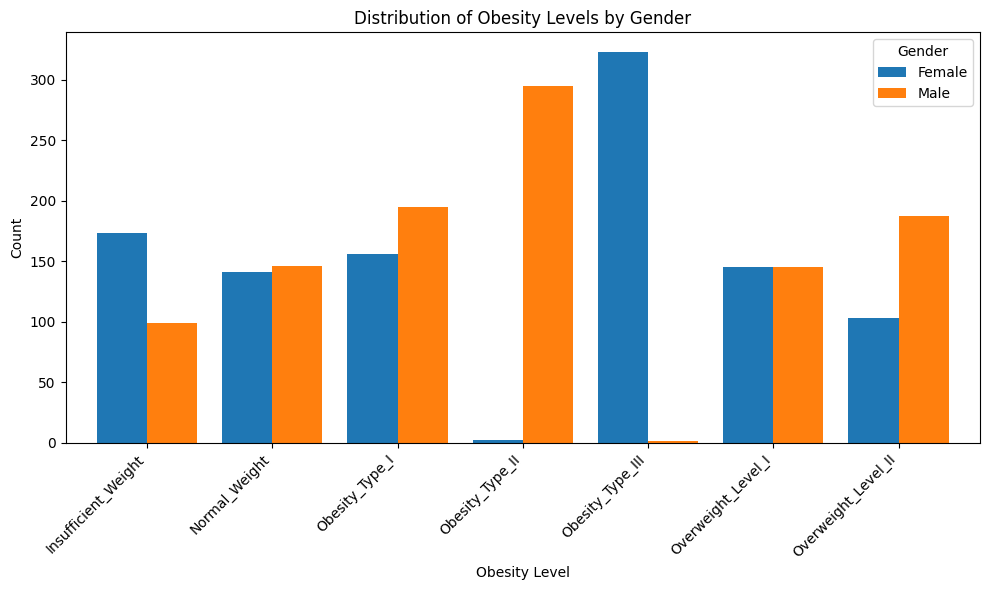

In [43]:
counts = df.groupby(["obesity_level", "Gender"]).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8   # controls spacing between groups
)
ax.set_title("Distribution of Obesity Levels by Gender")
ax.set_xlabel("Obesity Level")
ax.set_ylabel("Count")
ax.legend(title="Gender")

# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Now df contains encoded categorical data
df.describe()

,Gender,Age,Height,Weight,in_family,caloric_food_freq,vegetable_in_meals,daily_no_of_meals,eating_between_meals,smoker,daily_water_intake,monitor_caloric_intake,physical_activity_freq,time_on_devices,alcohol_intake,transport_means,obesity_level,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701620,86.586035,0.817622,0.883941,2.418986,2.685651,1.859308,0.020843,2.008053,0.045476,1.010313,0.657861,2.268593,2.365230,3.015632,29.703255
std,0.500083,6.357078,0.093368,26.191163,0.386247,0.320371,0.533996,0.778079,0.468543,0.142893,0.612950,0.208395,0.850613,0.608926,0.515498,1.261423,1.952090,8.016007
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998298
25%,0.000000,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,2.660000,2.000000,0.000000,1.585000,0.000000,0.125000,0.000000,2.000000,3.000000,1.000000,24.325802
50%,1.000000,23.000000,1.700000,83.000000,1.000000,1.000000,2.390000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625000,2.000000,3.000000,3.000000,28.731747
75%,1.000000,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.480000,0.000000,1.670000,1.000000,3.000000,3.000000,5.000000,35.954953
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000,50.816933


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2111 non-null   int64  
 1   Age                     2111 non-null   int64  
 2   Height                  2111 non-null   float64
 3   Weight                  2111 non-null   float64
 4   in_family               2111 non-null   int64  
 5   caloric_food_freq       2111 non-null   int64  
 6   vegetable_in_meals      2111 non-null   float64
 7   daily_no_of_meals       2111 non-null   float64
 8   eating_between_meals    2111 non-null   int64  
 9   smoker                  2111 non-null   int64  
 10  daily_water_intake      2111 non-null   float64
 11  monitor_caloric_intake  2111 non-null   int64  
 12  physical_activity_freq  2111 non-null   float64
 13  time_on_devices         2111 non-null   float64
 14  alcohol_intake          2111 non-null   

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.describe()

,Gender,Age,Height,Weight,in_family,caloric_food_freq,vegetable_in_meals,daily_no_of_meals,eating_between_meals,smoker,daily_water_intake,monitor_caloric_intake,physical_activity_freq,time_on_devices,alcohol_intake,transport_means,obesity_level,BMI
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,-5.385449e-17,-2.154180e-16,1.602171e-15,-1.077090e-16,-8.078174e-17,1.346362e-16,4.039087e-16,2.743213e-16,1.884907e-16,-2.019544e-17,-7.404993e-17,-6.731812e-17,-1.211726e-16,9.424537e-17,-5.048859e-17,-7.404993e-17,-4.039087e-17,-4.846904e-16
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-1.011914e+00,-1.623137e+00,-2.695555e+00,-1.817304e+00,-2.117337e+00,-2.759769e+00,-2.657927e+00,-2.166941e+00,-3.969213e+00,-1.459003e-01,-1.644983e+00,-2.182720e-01,-1.188028e+00,-1.080619e+00,-4.401822e+00,-1.875493e+00,-1.545188e+00,-2.084444e+00
25%,-1.011914e+00,-6.790835e-01,-7.672516e-01,-8.064185e-01,4.722913e-01,3.623491e-01,-7.848103e-01,-3.297536e-02,3.003456e-01,-1.459003e-01,-6.903558e-01,-2.182720e-01,-1.041040e+00,-1.080619e+00,-5.211595e-01,5.033367e-01,-1.032796e+00,-6.709983e-01
50%,9.882266e-01,-2.070567e-01,-1.735565e-02,-1.369502e-01,4.722913e-01,3.623491e-01,-5.429466e-02,4.041019e-01,3.003456e-01,-1.459003e-01,-1.314132e-02,-2.182720e-01,-1.212665e-02,-5.397861e-02,-5.211595e-01,5.033367e-01,-8.009930e-03,-1.212247e-01
75%,9.882266e-01,2.649700e-01,7.325403e-01,7.960282e-01,4.722913e-01,3.623491e-01,1.088307e+00,4.041019e-01,3.003456e-01,-1.459003e-01,7.701429e-01,-2.182720e-01,7.757271e-01,5.620055e-01,1.419172e+00,5.033367e-01,1.016776e+00,7.800865e-01
max,9.882266e-01,5.771949e+00,2.982228e+00,3.300138e+00,4.722913e-01,3.623491e-01,1.088307e+00,1.689623e+00,2.435125e+00,6.853997e+00,1.618701e+00,4.581439e+00,2.339676e+00,2.204630e+00,1.419172e+00,1.296280e+00,1.529168e+00,2.634564e+00


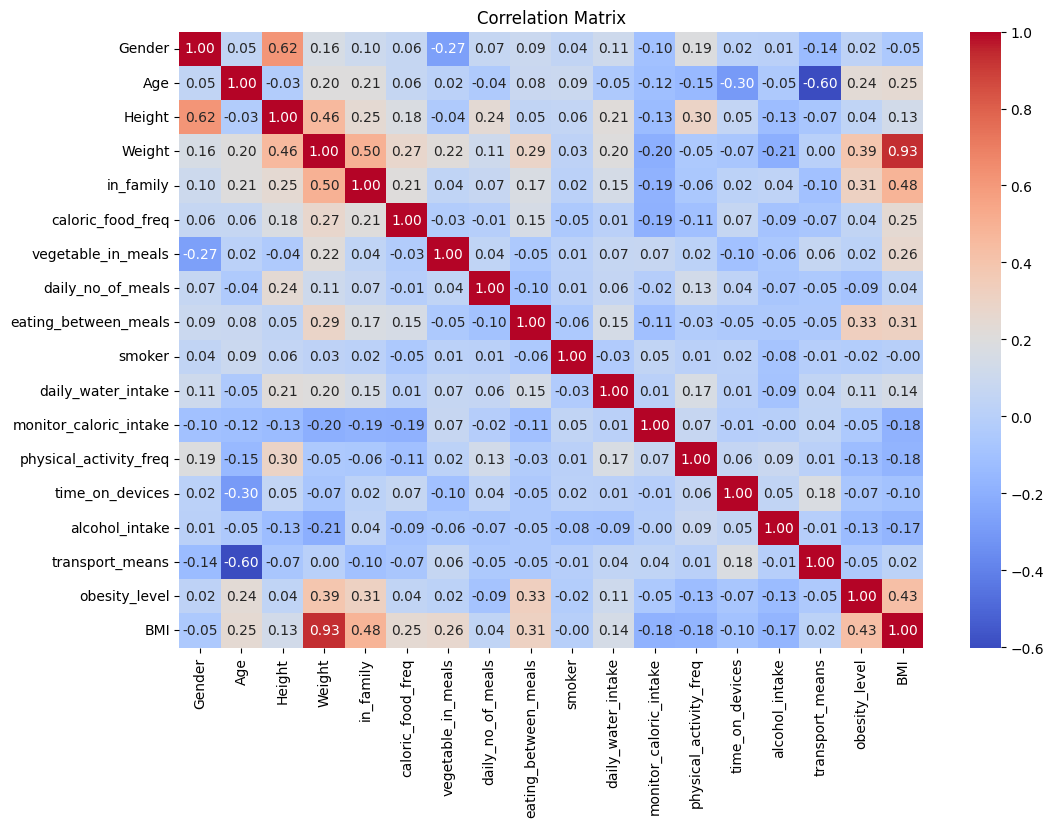

In [49]:
#Finding correlation between numerical data
correlation_matrix = df[numerical_columns].corr('pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()